## EA run comparison

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def getMinimizingArray(df, column):
    minsArray = []
    minValue = df[column][0]
    for value in np.array(df[column]):
        if value < minValue:
            minValue = value
        minsArray.append(minValue)    
    return np.array(minsArray)   

def getMaximizingArray(df, column):
    maxArray = []
    maxValue = df[column][0]
    for value in np.array(df[column]):
        if value > maxValue:
            maxValue = value
        maxArray.append(maxValue)    
    return np.array(maxArray)  

def getMinimisingIslandArray(array1, array2, steps):
    arrayLength = min(steps, min(len(array1), len(array2)))
    minsArray = []
    minValue = array1[0]
    for i in range(max(len(array1), len(array2))):
        if i < len(array1):
            if array1[i] < minValue:
                minValue = array1[i]
        if i < len(array2):
            if array2[i] < minValue:
                minValue = array2[i]
        minsArray.append(minValue)
    return np.array(minsArray)

def getMaximizingIslandArray(array1, array2, steps):
    arrayLength = min(steps, min(len(array1), len(array2)))
    minsArray = []
    minValue = array1[0]
    for i in range(max(len(array1), len(array2))):
        if i < len(array1):
            if array1[i] < minValue:
                minValue = array1[i]
            minsArray.append(minValue)
        if i < len(array2):
            if array2[i] < minValue:
                minValue = array2[i]
            minsArray.append(minValue)
    return np.array(minsArray)

def getMinimisingIslandArrayFull(array1, array2, steps):
    arrayLength = min(steps, min(len(array1), len(array2)))
    minsArray = []
    minValue = array1[0]
    for i in range(max(len(array1), len(array2))):
        if i < len(array1):
            if array1[i] < minValue:
                minValue = array1[i]
            minsArray.append(minValue)
        if i < len(array2):
            if array2[i] < minValue:
                minValue = array2[i]
            minsArray.append(minValue)
    return np.array(minsArray)

def getIslandArrayFull(array1, array2, steps):
    arrayLength = min(steps, min(len(array1), len(array2)))
    islandArray = []
    for i in range(max(len(array1), len(array2))):
        if i < len(array1):
            islandArray.append(array1[i])
        if i < len(array2):
            islandArray.append(array2[i])
    return np.array(islandArray)

Current model:

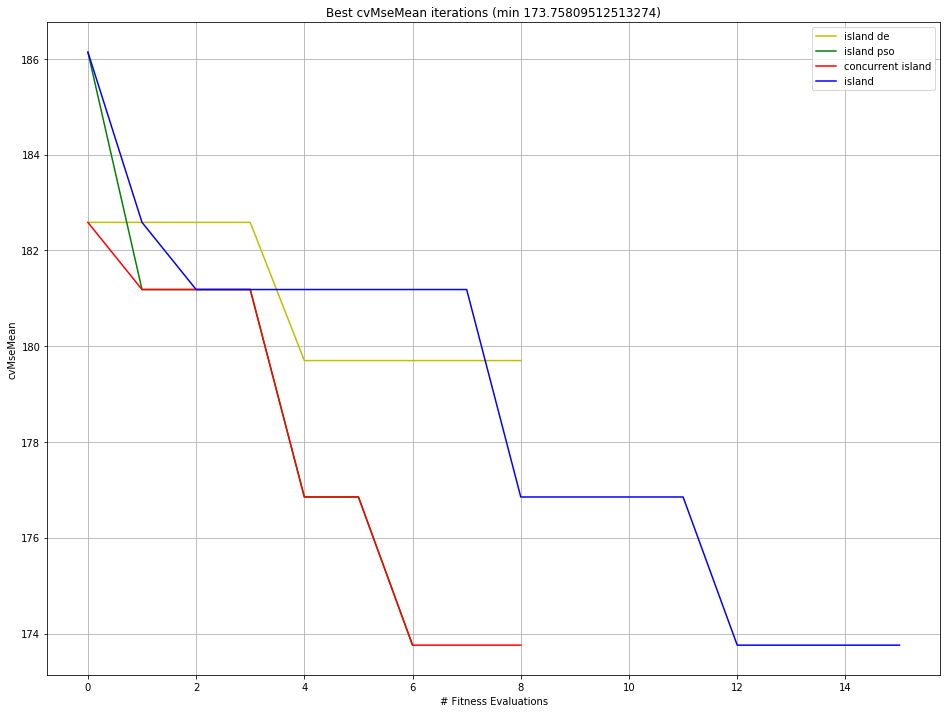

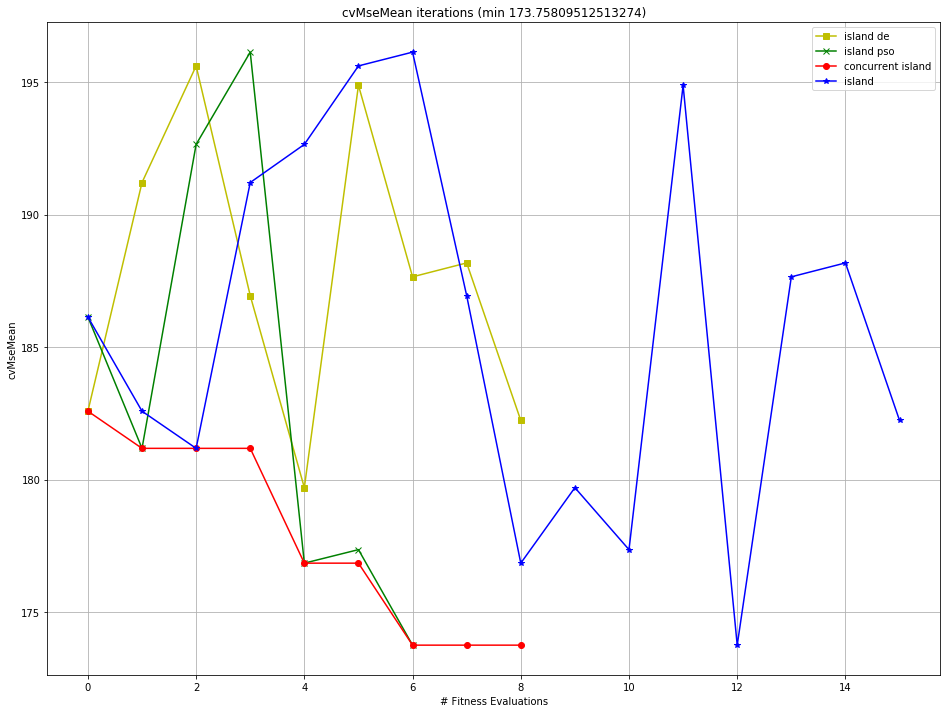

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column = "cvMseMean"
# column = "holdoutMse"

randFname = "randRuns.csv"
psoFname = "psoRuns.csv"
deFname = "deRuns.csv"
fpath = "../models/NarxModelSearch/logs/"

rand = False
pso = True
de = True
island = True

steps = 5000

# TODO: make case for Island

if rand:
    randDf = pd.read_csv(fpath + randFname)
    randDf["datetime"] = pd.to_datetime(randDf["datetime"])
    if len(randDf) > 0:
        rand = True
#     steps = min(steps, min(len(randDf)))
if pso:
    psoDf = pd.read_csv(fpath + psoFname)
    psoDf["datetime"] = pd.to_datetime(psoDf["datetime"])
#     steps = min(steps, min(len(psoDf)))
    if len(psoDf) > 0:
        pso = True   
if de:
    deDf = pd.read_csv(fpath + deFname)
    deDf["datetime"] = pd.to_datetime(deDf["datetime"])
#     steps = min(steps, min(len(deDf)))
    if len(deDf) > 0:
        de = True
        
if rand:
    steps = min(steps, len(randDf))
if pso:
    steps = min(steps, len(psoDf))
if de:
    steps = min(steps, len(deDf))
steps = 450   
    
if rand:
    randMseMin = getMinimizingArray(randDf.head(steps), column)
if pso:
    psoMseMin = getMinimizingArray(psoDf.head(steps), column)
if de:
    deMseMin = getMinimizingArray(deDf.head(steps), column)

rand = False
pso = True
de = True
island = True    
    
islandArray = np.empty(steps)
islandArray = []
islandArrayFull = []
islandArrayFull2 = []
if island:
    islandArray = getMinimisingIslandArray(psoMseMin, deMseMin, steps)
    islandArrayFull = getMinimisingIslandArrayFull(psoMseMin, deMseMin, steps)
    islandArrayFull2 = getIslandArrayFull(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), steps)
    if len(islandArray) > 0:
        island = True
    
    
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.set_ylabel(column)
ax.set_xlabel('# Fitness Evaluations')
ax.set_title('Best {} iterations (min {})'.format(column, min(islandArray)))
ax.grid(True)
if rand:                
    ax.plot(randMseMin);
if de:          
    ax.plot(deMseMin, 'y-');
if pso:         
    ax.plot(psoMseMin, 'g-');
if island:                
    ax.plot(islandArray, 'r-');
    ax.plot(islandArrayFull, 'b-');
ax.legend(["island de", "island pso", "concurrent island", "island"]);

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.set_ylabel(column)
ax.set_xlabel('# Fitness Evaluations')
ax.set_title('{} iterations (min {})'.format(column, min(islandArray)))
ax.grid(True)
if rand:                
    ax.plot(randDf[column]);
if de:          
    ax.plot(deDf[column], 'ys-');
if pso:         
    ax.plot(psoDf[column], 'gx-');
if island:                
    ax.plot(islandArray, 'ro-');
    ax.plot(islandArrayFull2, 'b*-');
ax.legend(["island de", "island pso", "concurrent island", "island"]);

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column = "cvMseMean"
# column = "holdoutMse"

randFname = "randRuns.csv"
psoFname = "psoRuns.csv"
deFname = "deRuns.csv"
fpath = "../models/NarxModelSearch/runs/tinyModels(randVspsoVsde)/island/logs/"

rand = False
pso = True
de = True
island = True

steps = 5000

# TODO: make case for Island

if rand:
    randDf = pd.read_csv(fpath + randFname)
    randDf["datetime"] = pd.to_datetime(randDf["datetime"])
    if len(randDf) > 0:
        rand = True
#     steps = min(steps, min(len(randDf)))
if pso:
    psoDf = pd.read_csv(fpath + psoFname)
    psoDf["datetime"] = pd.to_datetime(psoDf["datetime"])
#     steps = min(steps, min(len(psoDf)))
    if len(psoDf) > 0:
        pso = True   
if de:
    deDf = pd.read_csv(fpath + deFname)
    deDf["datetime"] = pd.to_datetime(deDf["datetime"])
#     steps = min(steps, min(len(deDf)))
    if len(deDf) > 0:
        de = True
        
if rand:
    steps = min(steps, len(randDf))
if pso:
    steps = min(steps, len(psoDf))
if de:
    steps = min(steps, len(deDf))
steps = 450   
    
if rand:
    randMseMin = getMinimizingArray(randDf.head(steps), column)
if pso:
    psoMseMin = getMinimizingArray(psoDf.head(steps), column)
if de:
    deMseMin = getMinimizingArray(deDf.head(steps), column)

rand = False
pso = True
de = True
island = True    
    
islandArray = np.empty(steps)
islandArray = []
islandArrayFull = []
islandArrayFull2 = []
if island:
    islandArray = getMinimisingIslandArray(psoMseMin, deMseMin, steps)
    islandArrayFull = getMinimisingIslandArrayFull(psoMseMin, deMseMin, steps)
    islandArrayFull2 = getIslandArrayFull(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), steps)
    if len(islandArray) > 0:
        island = True
    
    
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.set_ylabel(column)
ax.set_xlabel('# Fitness Evaluations')
ax.set_title('Best {} iterations (min {})'.format(column, min(islandArray)))
ax.grid(True)
if rand:                
    ax.plot(randMseMin);
if de:          
    ax.plot(deMseMin, 'y-');
if pso:         
    ax.plot(psoMseMin, 'g-');
if island:                
    ax.plot(islandArray, 'r-');
    ax.plot(islandArrayFull, 'b-');
ax.legend(["island de", "island pso", "concurrent island", "island"]);

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.set_ylabel(column)
ax.set_xlabel('# Fitness Evaluations')
ax.set_title('{} iterations (min {})'.format(column, min(islandArray)))
ax.grid(True)
if rand:                
    ax.plot(randDf[column]);
if de:          
    ax.plot(deDf[column], 'ys-');
if pso:         
    ax.plot(psoDf[column], 'gx-');
if island:                
    ax.plot(islandArray, 'ro-');
    ax.plot(islandArrayFull2, 'b*-');
ax.legend(["island de", "island pso", "concurrent island", "island"]);

In [ ]:
randFname = "randRuns.csv"
psoFname = "psoRuns.csv"
deFname = "deRuns.csv"
fpath = "../models/NarxModelSearch/runs/4gpu3Pso1RandAgents20Iters30IslandsEvery5RoundRobin/logs/"

randDf = pd.read_csv(fpath + randFname)
randDf["datetime"] = pd.to_datetime(randDf["datetime"])

psoDf = pd.read_csv(fpath + psoFname)
psoDf["datetime"] = pd.to_datetime(psoDf["datetime"])

deDf = pd.read_csv(fpath + deFname)
deDf["datetime"] = pd.to_datetime(psoDf["datetime"])

# column = "cvMseMean"
column = "holdoutIoa"
steps = 120
psoMseMin = getMaximizingArray(psoDf.head(steps), column)
randMseMin = getMaximizingArray(randDf.head(steps), column)
deMseMin = getMaximizingArray(deDf.head(steps), column)

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.set_ylabel('MSE')
ax.set_xlabel('Fitness Evaluations')
ax.set_title('Best {} iterations'.format(column))
ax.grid(True)
ax.plot(randMseMin);
ax.plot(psoMseMin);
ax.plot(deMseMin);
ax.legend(["rand", "pso", "de"]);

In [ ]:
fpath = "../models/NarxModelSearch/runs/2gpu2PsoAgents20Iters30IslandsEvery5RoundRobin/logs/"

# randDf = pd.read_csv(fpath + randFname)
# randDf["datetime"] = pd.to_datetime(randDf["datetime"])
psoDf = pd.read_csv(fpath + psoFname)
psoDf["datetime"] = pd.to_datetime(psoDf["datetime"])
# deDf = pd.read_csv(fpath + deFname)
# deDf["datetime"] = pd.to_datetime(psoDf["datetime"])

column = "holdoutIoa"
steps = 30
psoMseMin = getMaximizingArray(psoDf.head(steps), column)
randMseMin = getMaximizingArray(randDf.head(steps), column)
deMseMin = getMaximizingArray(deDf.head(steps), column)

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.set_ylabel('IoA')
ax.set_xlabel('Fitness Evaluations')
ax.set_title('Best {} iterations'.format(column))
ax.grid(True)
# ax.plot(randMseMin);
ax.plot(psoMseMin);
# ax.plot(deMseMin);
ax.legend(["rand", "pso", "de"]);

In [ ]:
print(len(psoDf), len(deDf), len(randDf), len(islandArray), len(islandArrayFull), min(islandArray))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column = "cvMseMean"
# column = "holdoutMse"

randFname = "randRuns.csv"
psoFname = "psoRuns.csv"
deFname = "deRuns.csv"
fpath = "../models/NarxModelSearch/runs/tinyModels(randVspsoVsde)/distinct/logs/"

rand = True
pso = True
de = True

steps = 5000

if rand:
    randDf = pd.read_csv(fpath + randFname)
    randDf["datetime"] = pd.to_datetime(randDf["datetime"])
    if len(randDf) > 0:
        rand = True
#     steps = min(steps, min(len(randDf)))
if pso:
    psoDf = pd.read_csv(fpath + psoFname)
    psoDf["datetime"] = pd.to_datetime(psoDf["datetime"])
#     steps = min(steps, min(len(psoDf)))
    if len(psoDf) > 0:
        pso = True   
if de:
    deDf = pd.read_csv(fpath + deFname)
    deDf["datetime"] = pd.to_datetime(deDf["datetime"])
#     steps = min(steps, min(len(deDf)))
    if len(deDf) > 0:
        de = True

if rand:
    steps = min(steps, len(randDf))
if pso:
    steps = min(steps, len(psoDf))
if de:
    steps = min(steps, len(deDf))
steps = 450   
    
if rand:
    randMseMin = getMinimizingArray(randDf.head(steps), column)
if pso:
    psoMseMin = getMinimizingArray(psoDf.head(steps), column)
if de:
    deMseMin = getMinimizingArray(deDf.head(steps), column)

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.set_ylabel(column)
ax.set_xlabel('# Fitness Evaluations')
ax.set_title('Best {} iterations (min {})'.format(column, min(psoMseMin)))
ax.grid(True)
if rand:                
    ax.plot(randMseMin);
if de:          
    ax.plot(deMseMin);
if pso:         
    ax.plot(psoMseMin);
if island:                
    ax.plot(islandArrayFull, 'b-');    
ax.legend(["rand", "de", "pso", "island"]);

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.set_ylabel(column)
ax.set_xlabel('# Fitness Evaluations')
ax.set_title('{} iterations (min {})'.format(column, min(psoMseMin)))
ax.grid(True)
if rand:                
    ax.plot(randDf[column]);
if de:          
    ax.plot(deDf[column]);
if pso:         
    ax.plot(psoDf[column]);
ax.legend(["rand", "de", "pso"]);

In [ ]:
print(min(psoMseMin), min(randMseMin), min(deMseMin), min(islandArrayFull))

In [ ]:
fpath = "../models/NarxModelSearch/runs/pm10randVs(pso+de)/logs/"

# randDf = pd.read_csv(fpath + randFname)
# randDf["datetime"] = pd.to_datetime(randDf["datetime"])
psoDf = pd.read_csv(fpath + psoFname)
psoDf["datetime"] = pd.to_datetime(psoDf["datetime"])
deDf = pd.read_csv(fpath + deFname)
deDf["datetime"] = pd.to_datetime(psoDf["datetime"])
randDf = pd.read_csv(fpath + randFname)
randDf["datetime"] = pd.to_datetime(psoDf["datetime"])

column = "holdoutIoa"
steps = min(500, min(len(deDf), len(psoDf)))
psoMseMin = getMaximizingArray(psoDf.head(steps), column)
randMseMin = getMaximizingArray(randDf.head(steps), column)
deMseMin = getMaximizingArray(deDf.head(steps), column)

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.set_ylabel('IoA')
ax.set_xlabel('Fitness Evaluations')
ax.set_title('Best {} iterations'.format(column))
ax.grid(True)
ax.plot(randMseMin);
ax.plot(psoMseMin);
ax.plot(deMseMin);
ax.legend(["pso", "de", "rand"]);


psoMseMin = psoDf[column].head(steps)
deMseMin = deDf[column].head(steps)

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.set_ylabel('IoA')
ax.set_xlabel('Fitness Evaluations')
ax.set_title('{} iterations'.format(column))
ax.grid(True)
ax.plot(randMseMin);
ax.plot(psoMseMin);
ax.plot(deMseMin);
ax.legend(["pso", "de", "rand"]);

# TODO: rand vs (pso + de + rand), not (pso + de)


In [ ]:
min(500, min(len(deDf), len(psoDf)))

In [ ]:
fpath = "../models/NarxModelSearch/runs/4gpuPsoDe5agents20iters4islandsEvery10/logs/"

# randDf = pd.read_csv(fpath + randFname)
# randDf["datetime"] = pd.to_datetime(randDf["datetime"])
psoDf = pd.read_csv(fpath + psoFname)
psoDf["datetime"] = pd.to_datetime(psoDf["datetime"])
deDf = pd.read_csv(fpath + deFname)
deDf["datetime"] = pd.to_datetime(psoDf["datetime"])

column = "holdoutIoa"
steps = 120
psoMseMin = getMaximizingArray(psoDf.head(steps), column)
# randMseMin = getMaximizingArray(randDf.head(steps), column)
deMseMin = getMaximizingArray(deDf.head(steps), column)

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.set_ylabel('IoA')
ax.set_xlabel('Fitness Evaluations')
ax.set_title('Best {} iterations'.format(column))
ax.grid(True)
# ax.plot(randMseMin);
ax.plot(psoMseMin);
ax.plot(deMseMin);
ax.legend(["pso, de"]);

In [ ]:
fpath = "../models/NarxModelSearch/logs/"

# randDf = pd.read_csv(fpath + randFname)
# randDf["datetime"] = pd.to_datetime(randDf["datetime"])
psoDf = pd.read_csv(fpath + psoFname)
psoDf["datetime"] = pd.to_datetime(psoDf["datetime"])
# deDf = pd.read_csv(fpath + deFname)
# deDf["datetime"] = pd.to_datetime(psoDf["datetime"])

column = "holdoutIoa"
steps = 120
psoMseMin = getMaximizingArray(psoDf.head(steps), column)
# randMseMin = getMaximizingArray(randDf.head(steps), column)
# deMseMin = getMaximizingArray(deDf.head(steps), column)

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.set_ylabel('IoA')
ax.set_xlabel('Fitness Evaluations')
ax.set_title('Best {} iterations'.format(column))
ax.grid(True)
# ax.plot(randMseMin);
ax.plot(psoMseMin);
# ax.plot(deMseMin);
ax.legend(["pso, de"]);